In [52]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## NN libs
import keras
from keras import backend as K
from keras import regularizers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.layers import Input, Dense, Activation, Reshape, Dropout, Flatten, Lambda
from keras.layers import Conv2DTranspose, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, UpSampling2D, UpSampling1D 
from keras.layers import LocallyConnected1D, LocallyConnected2D, LSTM, RepeatVector
from keras.preprocessing.image import ImageDataGenerator as IDG
from keras.models import Model
from keras.callbacks import TensorBoard

In [53]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# local libs
import config, models, functions
from data import data, midi, midi_generators as g
from utils import io, models_io, utils, plot

In [55]:
context = data.init()
n = 2
multiTrack = True
context, x_train, labels = data.import_data(data.init(), n, multiTrack=multiTrack)

Setting up params

max min f 25.0 0.5
 >> Context(max_t=2.0, dt=0.02, n_instances=100, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
Setting up params

max min f 25.0 0.5
 >> Context(max_t=2.0, dt=0.02, n_instances=100, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
Importing midi-data

 [INFO] : 
 |  reading file: ../datasets/examples/01 16th Snare.mid
 [INFO] : 
 |  reading file: ../datasets/examples/01 8th Cym.mid

Encoding midi-data
 [<midi file '../datasets/examples/01 16th Snare.mid' type 0, 1 tracks, 182 messages>, <midi file '../datasets/examples/01 8th Cym.mid' type 0, 1 tracks, 68 messages>]
> -> multi-track = True
<meta message track_name name='01 16th Snare\x00' time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
note_on channel=0 note=36 velocity=104 time=0
note

In [56]:
n = 100
min_f = 3
max_f = 15
# x_train = g.gen_data(context, n, max_f=max_f, min_f=min_f)
# x_train = g.gen_data_complex(context, n, max_f=max_f, min_f=min_f, multiTrack=multiTrack)
x_train = g.gen_data_complex(context, n, max_f=max_f, min_f=min_f, 
    n_polyrythms=1,
    n_channels=midi.N_NOTES,
    multiTrack=multiTrack)

note_on channel=0 note=62 velocity=127 time=0.06666666666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.04895833333333333
note_on channel=0 note=62 velocity=127 time=0.0010416666666666667
note_off channel=0 note=61 velocity=127 time=0.01875
note_off channel=0 note=62 velocity=127 time=0.0010416666666666667
note_on channel=0 note=60 velocity=127 time=0.00625
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.02395833333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.05
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.04895833333333333
note_on channel=0 note=62 velocity=127 time=0.0020833333333333333
note_off channel=0 note=61 velocity=127 time=0.01875
note_off channel=0 note=62 velocity=127 time=0.0020833333333333333
note_on

note_on channel=0 note=61 velocity=127 time=0.007291666666666667
note_off channel=0 note=60 velocity=127 time=0.0125
note_off channel=0 note=61 velocity=127 time=0.007291666666666667
note_on channel=0 note=60 velocity=127 time=0.04895833333333333
note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_on channel=0 note=62 velocity=127 time=0.0125
note_off channel=0 note=60 velocity=127 time=0.003125
note_off channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=62 velocity=127 time=0.0125
note_on channel=0 note=60 velocity=127 time=0.03854166666666667
note_on channel=0 note=61 velocity=127 time=0.0020833333333333333
note_off channel=0 note=60 velocity=127 time=0.017708333333333333
note_off channel=0 note=61 velocity=127 time=0.0020833333333333333
note_on channel=0 note=60 velocity=127 time=0.05416666666666667
note_on channel=0 note=61 velocity=127 time=0
note_on channel=0 note=62 velocity=127 time=0.014583333333333334
note_off channel=0 note=60 

note_on channel=0 note=62 velocity=127 time=0.07708333333333334
note_on channel=0 note=60 velocity=127 time=0.004166666666666667
note_off channel=0 note=62 velocity=127 time=0.015625
note_off channel=0 note=60 velocity=127 time=0.004166666666666667
note_on channel=0 note=61 velocity=127 time=0.09791666666666667
note_on channel=0 note=62 velocity=127 time=0.009375
note_off channel=0 note=61 velocity=127 time=0.011458333333333333
note_off channel=0 note=62 velocity=127 time=0.009375
note_on channel=0 note=60 velocity=127 time=0.1
note_on channel=0 note=62 velocity=127 time=0.010416666666666666
note_off channel=0 note=60 velocity=127 time=0.009375
note_off channel=0 note=62 velocity=127 time=0.010416666666666666
note_on channel=0 note=61 velocity=127 time=0.07916666666666666
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.011458333333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 no

note_off channel=0 note=61 velocity=127 time=0.015625
note_on channel=0 note=60 velocity=127 time=0.020833333333333332
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.01875
note_on channel=0 note=61 velocity=127 time=0.003125
note_off channel=0 note=62 velocity=127 time=0.016666666666666666
note_off channel=0 note=61 velocity=127 time=0.003125
note_on channel=0 note=61 velocity=127 time=0.06354166666666666
note_on channel=0 note=62 velocity=127 time=0.009375
note_off channel=0 note=61 velocity=127 time=0.010416666666666666
note_on channel=0 note=60 velocity=127 time=0
note_off channel=0 note=62 velocity=127 time=0.009375
note_off channel=0 note=60 velocity=127 time=0.010416666666666666
note_on channel=0 note=61 velocity=127 time=0.042708333333333334
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.0020833333333333333
note_off channel=0 note=62 velocity=127 time

note_on channel=0 note=61 velocity=127 time=0.0375
note_on channel=0 note=62 velocity=127 time=0.0125
note_off channel=0 note=61 velocity=127 time=0.007291666666666667
note_on channel=0 note=60 velocity=127 time=0.00625
note_off channel=0 note=62 velocity=127 time=0.007291666666666667
note_off channel=0 note=60 velocity=127 time=0.013541666666666667
note_on channel=0 note=62 velocity=127 time=0.036458333333333336
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.00625
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.003125
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.046875
note_on channel=0 note=62 velocity=127 time=0.003125
note_off channel=0 note=61 velocity=127 time=0.016666666666666

note_off channel=0 note=61 velocity=127 time=0.00625
note_on channel=0 note=60 velocity=127 time=0.04375
note_on channel=0 note=61 velocity=127 time=0.013541666666666667
note_off channel=0 note=60 velocity=127 time=0.00625
note_off channel=0 note=61 velocity=127 time=0.013541666666666667
note_on channel=0 note=60 velocity=127 time=0.035416666666666666
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.0010416666666666667
note_on channel=0 note=61 velocity=127 time=0
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_off channel=0 note=61 velocity=127 time=0
note_on channel=0 note=60 velocity=127 time=0.027083333333333334
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.009375
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.019791666666666666
note_off channel=0 note=60 velocity=127 

note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.022916666666666665
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.014583333333333334
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.003125
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.035416666666666666
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.058333333333333334
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.0020833333333333333
note_on channel=0 note=62 velocity=127 time=0.019791666666666666
note_off channel=0 note=61 velocity=127 time=0
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t,

note_on channel=0 note=61 velocity=127 time=0.02395833333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.0010416666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.042708333333333334
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.06354166666666666
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.003125
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.005208333333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.015625
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.06354166666666666
note_off channel=0 note=61 velocity=127 time

note_on channel=0 note=62 velocity=127 time=0.034375
note_on channel=0 note=60 velocity=127 time=0.014583333333333334
note_off channel=0 note=62 velocity=127 time=0.005208333333333333
note_off channel=0 note=60 velocity=127 time=0.014583333333333334
note_on channel=0 note=61 velocity=127 time=0.019791666666666666
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.059375
note_on channel=0 note=61 velocity=127 time=0.0020833333333333333
note_off channel=0 note=62 velocity=127 time=0.017708333333333333
note_off channel=0 note=61 velocity=127 time=0.0020833333333333333
note_on channel=0 note=62 velocity=127 time=0.057291666666666664
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.010416666666666666
note_off channel=0 note=61 velocity=127 time=0.019791

note_on channel=0 note=62 velocity=127 time=0.005208333333333333
note_on channel=0 note=61 velocity=127 time=0.008333333333333333
note_off channel=0 note=62 velocity=127 time=0.0125
note_off channel=0 note=61 velocity=127 time=0.008333333333333333
note_on channel=0 note=60 velocity=127 time=0.028125
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.004166666666666667
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.051041666666666666
note_on channel=0 note=60 velocity=127 time=0.0010416666666666667
note_on channel=0 note=62 velocity=127 time=0.013541666666666667
note_off channel=0 note=61 velocity=127 time=0.00625
note_off channel=0 note=60 velocity=127 time=0.0010416666666666667
note_off channel=0 note=62 velocity=127 time=0.013541666666666667
note_on channel=0 note=61 velocity=127 time=0.0375
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
not

note_off channel=0 note=62 velocity=127 time=0.016666666666666666
note_off channel=0 note=61 velocity=127 time=0.004166666666666667
note_on channel=0 note=60 velocity=127 time=0.030208333333333334
note_on channel=0 note=62 velocity=127 time=0.014583333333333334
note_off channel=0 note=60 velocity=127 time=0.00625
note_off channel=0 note=62 velocity=127 time=0.014583333333333334
note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.022916666666666665
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.027083333333333334
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.0010416666666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.04791666666666666
note_on channel=0 note=61 velo

note_on channel=0 note=60 velocity=127 time=0.04375
note_on channel=0 note=61 velocity=127 time=0.013541666666666667
note_on channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=60 velocity=127 time=0
note_off channel=0 note=61 velocity=127 time=0.013541666666666667
note_off channel=0 note=62 velocity=127 time=0.00625
note_on channel=0 note=61 velocity=127 time=0.051041666666666666
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.05
note_on channel=0 note=61 velocity=127 time=0.008333333333333333
note_off channel=0 note=60 velocity=127 time=0.0125
note_off channel=0 note=61 velocity=127 time=0.008333333333333333
note_on channel=0 note=61 velocity=127 time=0.057291666666666664
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.0020833333333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 

note_off channel=0 note=62 velocity=127 time=0.014583333333333334
note_on channel=0 note=61 velocity=127 time=0.011458333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.022916666666666665
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.03854166666666667
note_on channel=0 note=61 velocity=127 time=0.017708333333333333
note_off channel=0 note=62 velocity=127 time=0.003125
note_on channel=0 note=60 velocity=127 time=0.010416666666666666
note_off channel=0 note=61 velocity=127 time=0.00625
note_off channel=0 note=60 velocity=127 time=0.013541666666666667
note_on channel=0 note=60 velocity=127 time=0.06875
note_on channel=0 note=62 velocity=127 time=0.013541666666666667
note_on channel=0 note=61 velocity=127 time=0.003125
note_off channel=0 note=60 velocity=127 time=0.004166666666666667
note_off channel=0 note=62 velocity=127 time=0.013541666666666667
not

note_off channel=0 note=62 velocity=127 time=0.0125
note_off channel=0 note=61 velocity=127 time=0.007291666666666667
note_on channel=0 note=60 velocity=127 time=0.035416666666666666
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.02395833333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.021875
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.04479166666666667
note_on channel=0 note=60 velocity=127 time=0.013541666666666667
note_off channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=60 velocity=127 time=0.013541666666666667
note_on channel=0 note=61 velocity=127 time=0.04375
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.010416666666666666
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_

note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.058333333333333334
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.025
note_on channel=0 note=60 velocity=127 time=0.00625
note_off channel=0 note=62 velocity=127 time=0.013541666666666667
note_off channel=0 note=60 velocity=127 time=0.00625
note_on channel=0 note=61 velocity=127 time=0.058333333333333334
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.01875
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.07083333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.0125
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.027083333333333334
note_off channel=0 no

note_on channel=0 note=62 velocity=127 time=0.0020833333333333333
note_off channel=0 note=60 velocity=127 time=0.017708333333333333
note_off channel=0 note=62 velocity=127 time=0.0020833333333333333
note_on channel=0 note=61 velocity=127 time=0.019791666666666666
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.01875
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.025
note_on channel=0 note=60 velocity=127 time=0.00625
note_off channel=0 note=61 velocity=127 time=0.013541666666666667
note_off channel=0 note=60 velocity=127 time=0.00625
note_on channel=0 note=62 velocity=127 time=0.007291666666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.03125
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.007291666666666667
note_off channel=

note_on channel=0 note=61 velocity=127 time=0.03958333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.03333333333333333
note_on channel=0 note=61 velocity=127 time=0.017708333333333333
note_off channel=0 note=62 velocity=127 time=0.0020833333333333333
note_off channel=0 note=61 velocity=127 time=0.017708333333333333
note_on channel=0 note=61 velocity=127 time=0.051041666666666666
note_on channel=0 note=60 velocity=127 time=0.014583333333333334
note_off channel=0 note=61 velocity=127 time=0.005208333333333333
note_on channel=0 note=62 velocity=127 time=0.003125
note_off channel=0 note=60 velocity=127 time=0.011458333333333333
note_off channel=0 note=62 velocity=127 time=0.008333333333333333
note_on channel=0 note=61 velocity=127 time=0.028125
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.04479166666666667
note_on channel=0 note=61 velocity=127 time=

note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.015625
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.051041666666666666
note_on channel=0 note=62 velocity=127 time=0.003125
note_off channel=0 note=60 velocity=127 time=0.016666666666666666
note_off channel=0 note=62 velocity=127 time=0.003125
note_on channel=0 note=61 velocity=127 time=0.017708333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.016666666666666666
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.009375
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.02395833333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.036458333333333336
n

note_on channel=0 note=60 velocity=127 time=0.02395833333333333
note_on channel=0 note=62 velocity=127 time=0.004166666666666667
note_off channel=0 note=60 velocity=127 time=0.015625
note_off channel=0 note=62 velocity=127 time=0.004166666666666667
note_on channel=0 note=61 velocity=127 time=0.022916666666666665
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.0010416666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.03125
note_on channel=0 note=60 velocity=127 time=0.016666666666666666
note_off channel=0 note=61 velocity=127 time=0.003125
note_on channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=60 velocity=127 time=0.010416666666666666
note_off channel=0 note=62 velocity=127 time=0.009375
note_on channel=0 note=61 velocity=127 time=0.026041666666666668
note_on channel=0 note=60 velocity=127 time=0.013541666666666667
note_off channe

note_off channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=60 velocity=127 time=0.013541666666666667
note_on channel=0 note=62 velocity=127 time=0.035416666666666666
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.04895833333333333
note_on channel=0 note=60 velocity=127 time=0.010416666666666666
note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=62 velocity=127 time=0.004166666666666667
note_off channel=0 note=60 velocity=127 time=0.010416666666666666
note_off channel=0 note=61 velocity=127 time=0.005208333333333333
note_on channel=0 note=62 velocity=127 time=0.03333333333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.04895833333333333
note_on channel=0 note=60 velocity=127 time=0.007291666666666667
note_off channel=0 note=62 velocity=127 time=0.0125
note_off channel=0 note=60 velocity=127 time=0.

note_on channel=0 note=61 velocity=127 time=0.016666666666666666
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.0125
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.016666666666666666
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.0125
note_on channel=0 note=60 velocity=127 time=0.003125
note_off channel=0 note=62 velocity=127 time=0.016666666666666666
note_off channel=0 note=60 velocity=127 time=0.003125
note_on channel=0 note=61 velocity=127 time=0.0125
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.013541666666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.015625
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velo

note_on channel=0 note=60 velocity=127 time=0.04791666666666666
note_on channel=0 note=61 velocity=127 time=0.01875
note_off channel=0 note=60 velocity=127 time=0.0010416666666666667
note_on channel=0 note=62 velocity=127 time=0.016666666666666666
note_off channel=0 note=61 velocity=127 time=0.003125
note_off channel=0 note=62 velocity=127 time=0.016666666666666666
note_on channel=0 note=60 velocity=127 time=0.01875
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.04479166666666667
note_on channel=0 note=60 velocity=127 time=0.010416666666666666
note_off channel=0 note=62 velocity=127 time=0.009375
note_off channel=0 note=60 velocity=127 time=0.010416666666666666
note_on channel=0 note=60 velocity=127 time=0.05520833333333333
note_on channel=0 note=61 velocity=127 time=0.0125
note_on channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=60 velocity=127 time=0.0020833333333333333
note_off channel=0 note=61 velo

note_off channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=61 velocity=127 time=0.005208333333333333
note_on channel=0 note=60 velocity=127 time=0.034375
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.013541666666666667
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.0125
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.036458333333333336
note_on channel=0 note=60 velocity=127 time=0.010416666666666666
note_off channel=0 note=61 velocity=127 time=0.009375
note_off channel=0 note=60 velocity=127 time=0.010416666666666666
note_on channel=0 note=62 velocity=127 time=0.010416666666666666
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.015625
note_on channel=0 note=61 velocity=127 time=0.011458333333333333
note_off channe

note_on channel=0 note=62 velocity=127 time=0.041666666666666664
note_on channel=0 note=61 velocity=127 time=0.0125
note_off channel=0 note=62 velocity=127 time=0.007291666666666667
note_off channel=0 note=61 velocity=127 time=0.0125
note_on channel=0 note=62 velocity=127 time=0.034375
note_on channel=0 note=60 velocity=127 time=0.004166666666666667
note_off channel=0 note=62 velocity=127 time=0.016666666666666666
note_on channel=0 note=61 velocity=127 time=0.0020833333333333333
note_off channel=0 note=60 velocity=127 time=0.0010416666666666667
note_off channel=0 note=61 velocity=127 time=0.01875
note_on channel=0 note=62 velocity=127 time=0.02395833333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.0125
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.008333333333333333
note_on channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=60 veloc

note_off channel=0 note=62 velocity=127 time=0.013541666666666667
note_on channel=0 note=61 velocity=127 time=0.05625
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.003125
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.09375
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.09166666666666666
note_on channel=0 note=60 velocity=127 time=0.0020833333333333333
note_on channel=0 note=62 velocity=127 time=0.005208333333333333
note_off channel=0 note=61 velocity=127 time=0.0125
note_off channel=0 note=60 velocity=127 time=0.0020833333333333333
note_off channel=0 note=62 velocity=127 time=0.005208333333333333
note_on channel=0 note=60 velocity=127 time=0.0875
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.09375
note_on channel=0 note=61 velo

In [57]:
n = 3
total = 1000 * 1
x_test = x_train[n:]
x_train = np.concatenate([x_train[:n] for _ in range(int(total/n))])

m (30, 3)


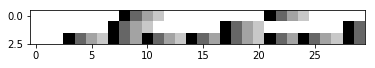

In [58]:
plot.multi(x_train[0, :30])

m (30, 3)


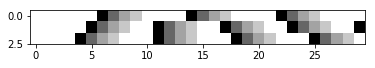

In [59]:
plot.multi(x_train[1, :30])

In [60]:
x_train.shape

(999, 100, 3)

In [61]:
params = {'batch_size': 64, 'shuffle': True}

In [70]:
x_train = x_train.reshape(list(x_train.shape) + [1])

In [71]:
x_train.shape

(999, 100, 3, 1)

In [64]:
datagen = IDG(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by dataset std
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=0,  # randomly rotate images in 0 to 180 degrees
#         width_shift_range=0.1,  # randomly shift images horizontally
#         height_shift_range=0.1,  # randomly shift images vertically
#         horizontal_flip=True,  # randomly flip images
#         vertical_flip=False)  # randomly flip images
)

In [65]:
# class ImageDataGenerator(IDG):
datagen.fit(x_train)

ValueError: Input to `.fit()` should have rank 4. Got array with shape: (999, 100, 3)

In [35]:
input_shape = x_train[0].shape
input_shape

(100, 3)

In [36]:
batch_size = 100
latent_dim = 2
intermediate_dim = 128
epsilon_std = 1.0

In [49]:
def encoder(input_size, dropout=0.1):
    encoder_input = Input(shape=original_img_size)
    
    # Convolve & Pool
    h = encoder_input
    h = Conv1D(32, kernel_size=2, strides=2, activation='relu', padding='same')(h)
    h = Conv1D(32, kernel_size=2, strides=1, activation='relu', padding='same')(h)
    h = Conv1D(64, kernel_size=2, strides=2, activation='relu', padding='same')(h)
    h = Conv1D(64, kernel_size=2, strides=1, activation='relu', padding='same')(h)
    #     x = AveragePooling2D((2, 2))(x)
    h = Conv1D(128, kernel_size=2, strides=2, activation='relu', padding='same')(h)

    # Dense layers
    h = Dropout(dropout)(h) # uncomment when using larger batches
    h = Flatten()(h)
    h = Dropout(dropout)(h) # uncomment when using larger batches

    h = Dense(intermediate_dim, activation='relu')(h)
    #     h = Dense(intermediate_dim, activation='relu')(h)
    #     h = Dense(intermediate_dim, activation='relu')(h)    
    #     h = Dense(intermediate_dim, activation='relu')(h)
        # h = Dense(intermediate_dim, activation='relu', kernel_regularizer=k_reg, activity_regularizer=a_reg)(h)
    
    # Z Mean, Variance
    z_mean = Dense(latent_dim, name='z_mean')(h) # , activation='relu'
    z_log_var = Dense(latent_dim, name='z_log_var')(h) # , activation='relu'
        
    encoder_output = [z_mean, z_log_var]
    encoder_model = Model(encoder_input, encoder_output, name='encoder_model-')
    return encoder_model, encoder_input, z_mean, z_log_var

In [50]:
encoder_model, encoder_input, z_mean, z_log_var = encoder(input_shape)
encoder_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 100, 3)       0                                            
__________________________________________________________________________________________________
conv1d_23 (Conv1D)              (None, 50, 32)       224         input_7[0][0]                    
__________________________________________________________________________________________________
conv1d_24 (Conv1D)              (None, 50, 32)       2080        conv1d_23[0][0]                  
__________________________________________________________________________________________________
conv1d_25 (Conv1D)              (None, 25, 64)       4160        conv1d_24[0][0]                  
__________________________________________________________________________________________________
conv1d_26 

In [45]:
sample_ = lambda args: models.sample(args, z_mean, z_log_var, latent_dim, epsilon_std)

In [17]:
# z = Lambda(sampling)([z_mean, z_log_var])
z_input = encoder_model(encoder_input)
z_output = Lambda(sample_)(z_input)

In [18]:
def list_decoders(output_size, p='valid'):
    # decoder_input = z_output
    # h = decoder_input
    # :output_shape = (timesteps, channels, channels) || (batches, filters, timesteps, channels)
    # keras offers just Conv2DTranspose and not Conv1DTranspose
    # - use 2D images during upsampling :: (timesteps, notes, channels) => (timesteps, notes, filters)
    # - use 1D images to optimize reconstruction :: (timesteps, filters) => (timesteps, notes)
    
    # image_data_format = 'channels_last'
    # goal shape: (timesteps, notes, channels)
    # start with the 'reverse': lots of small imgs => few large img
    
    timesteps = output_size[-2] # cols
    notes = output_size[-1] # rows
    channels = 1 # rgb
    m = 4 # multiplier for dims
    
    # at the start of upsampling, the image-structure does not yet have to correspond to the goal structure 
    # ?TODO use y*y*y starting dims, may conv, and only then correct the structure (?)
    output_shape = (channels, notes * m, timesteps)
    
    # we instantiate these layers separately so as to reuse them later
    decoders = []
    decoders += [ Dense(intermediate_dim, activation='relu') ]
    decoders += [ Dense(np.prod(output_shape[-3:]), activation='relu') ]
    decoders += [ Reshape(output_shape[-3:]) ]
    
    # Convolve & Pool
    
    # Note that the kernel windows do not yet correspond to 'temporal' features, but rather to just spatial features
    k = (3,2) # (2,1) :: (timesteps, notes)
    s = (1,3)
    timesteps_ = int(timesteps / 2)
    
    decoders += [ Conv2DTranspose(timesteps_, kernel_size=k, strides=3, activation='relu', padding=p) ]
    decoders += [ Conv2DTranspose(32, kernel_size=k, strides=3, activation='relu', padding=p) ]
    # decoder += [Conv2DTranspose(32, kernel_size=k, strides=3, activation='relu', padding=p)]
    decoders += [ Conv2DTranspose(16, kernel_size=k, strides=(3,1), activation='relu', padding=p)]
    decoders += [ Conv2DTranspose(16, kernel_size=k, strides=3, activation='relu', padding=p)]
    
    # 'end' of upsampling
    decoders += [ Conv2D(1, kernel_size=(1,2), strides=1, activation='relu', padding=p) ]
    # shape = ()
    # decoder_reshape2 = Reshape(dims[0:2])
    # #     h = Conv1D(16, kernel_size=2, strides=1, activation='relu', padding=p)(h)
    # decoder_conv2 = Conv1D(notes * m, kernel_size=2, strides=2, activation='relu', padding=p)
    
    
    # Mean (output)
    #     h = Conv2D(1, kernel_size=1, strides=s, activation='sigmoid', padding='same')(h)
    output_shape = (timesteps, notes)
    
    decoders += [ Flatten()]
    decoders += [ Dense(np.prod(output_shape), activation='sigmoid')]
    decoders += [ Reshape(output_shape)]
    return decoders

In [19]:
decoders = list_decoders(original_input_size)

In [20]:
decoded = utils.composition(decoders, z_output, verbose=False)

In [21]:
# instantiate VAE model
vae_input = encoder_input
vae_output = decoded
vae = Model(vae_input, vae_output)
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 3)       0                                            
__________________________________________________________________________________________________
encoder_model- (Model)          [(None, 2), (None, 2 414628      input_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 2)            0           encoder_model-[1][0]             
                                                                 encoder_model-[1][1]             
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 1200)         3600        lambda_1[0][0]                   
__________

In [22]:
# Compute VAE loss
# no img_cols! no notes!
def vae_loss(beta=1.):
    # y_true, y_pred, z_mean, z_log_var, timesteps=150, notes=3, beta=1.
    xent_loss = timesteps * keras.metrics.binary_crossentropy(K.flatten(vae_input), K.flatten(vae_output))
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    vae_loss = K.mean(xent_loss + kl_loss)
    return vae_loss

vae_loss = vae_loss()
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
# vae.compile(optimizer=optimizer, loss=loss, metrics=metrics)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Output "reshape_2" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "reshape_2" during training.
  if sys.path[0] == '':


In [23]:
# train the VAE on MNIST digits
# (x_train, _), (x_test, y_test) = mnist.load_data()
x_test = x_train[-100:]
y_test = x_test

In [24]:
x_train.shape

(999, 100, 3)

In [25]:
print('x_train.shape:', x_train.shape)

x_train.shape: (999, 100, 3)


In [28]:
epochs = 50
X = models.DataGenerator(x_train, **params)
# history = vae.fit(x_train,shuffle=True, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))
history = vae.fit_generator(
    X, epochs=epochs, steps_per_epoch=X.__len__(),
    use_multiprocessing=True, workers=2,
    validation_data=(x_test, None))

Epoch 1/50
15/15 [==============================] - 14s 948ms/step - loss: 63.4891 - val_loss: 63.5382
Epoch 2/50
15/15 [==============================] - 14s 901ms/step - loss: 63.4760 - val_loss: 63.1686
Epoch 3/50
15/15 [==============================] - 13s 895ms/step - loss: 63.5143 - val_loss: 63.6121
Epoch 4/50
15/15 [==============================] - 14s 921ms/step - loss: 63.3552 - val_loss: 63.9185
Epoch 5/50
15/15 [==============================] - 14s 905ms/step - loss: 63.4005 - val_loss: 63.1932
Epoch 6/50
15/15 [==============================] - 14s 915ms/step - loss: 63.4084 - val_loss: 62.7233
Epoch 7/50
15/15 [==============================] - 14s 909ms/step - loss: 63.2814 - val_loss: 63.7910
Epoch 8/50
15/15 [==============================] - 14s 904ms/step - loss: 63.2398 - val_loss: 63.0896
Epoch 9/50
15/15 [==============================] - 13s 887ms/step - loss: 63.2182 - val_loss: 63.5656
Epoch 10/50
15/15 [==============================] - 14s 946ms/step - los

Process ForkPoolWorker-40:
Process ForkPoolWorker-39:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()


KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
x = vae.predict(x_train[:10])
plot.multi(x[0, :30])

In [ ]:
plot.multi(x[3, :30])

In [ ]:
# interpolate - mean
m = x.mean(axis=0)
plot.multi(m[:30])

In [ ]:
# interpolate - min: these pixels are 'always' active
m = x.min(axis=0)
plot.multi(m[:30])

In [ ]:
# build a model to project inputs on the latent space
encoder = Model(encoder_input, z_mean)

In [ ]:
x_test.shape

In [ ]:
m = 100
x_train_encoded = encoder.predict(x_train[:m], batch_size=batch_size)
x_train_encoded.shape

In [ ]:
# y_test = range(x_train_encoded.shape[0])
y_test = np.concatenate([list(range(n)) for _ in range(int(m/n)+1)])[:m] / n
plt.figure(figsize=(6, 6))
plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1], c=y_test, alpha=0.1, s=30)

In [ ]:
# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

In [ ]:
# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_decoded = utils.composition(decoders, decoder_input, verbose=False)
generator = Model(decoder_input, _decoded)

In [ ]:
# x_decoded[0].reshape(150,3)

In [ ]:
# display a 2D manifold of the digits
n = 3  # figure with 15x15 digits
digit_size1 = x_decoded.shape[-2]
digit_size2 = x_decoded.shape[-1]
figure = np.zeros((digit_size1 * n, digit_size1 * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
        x_decoded = generator.predict(z_sample, batch_size=batch_size)
        digit = x_decoded[0].reshape(digit_size1, digit_size2)
        figure[i * digit_size1: (i + 1) * digit_size1,
               j * digit_size2: (j + 1) * digit_size2] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()